In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC  
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [35]:
df=pd.read_csv("chronic_kidney_disease_full.csv",na_values= "?")

In [36]:
df.head(20)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,74.0,...,39.0,7800.0,4.4,yes,yes,no,good,yes,no,ckd
6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,100.0,...,36.0,NaN,NaN,no,no,no,good,no,no,ckd
7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,410.0,...,44.0,6900.0,5.0,no,yes,no,good,yes,no,ckd
8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,138.0,...,33.0,9600.0,4.0,yes,yes,no,good,no,yes,ckd
9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,...,29.0,12100.0,3.7,yes,yes,no,poor,no,yes,ckd


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    float64
 1   bp      388 non-null    float64
 2   sg      353 non-null    float64
 3   al      354 non-null    float64
 4   su      351 non-null    float64
 5   rbc     248 non-null    object 
 6   pc      335 non-null    object 
 7   pcc     396 non-null    object 
 8   ba      396 non-null    object 
 9   bgr     356 non-null    float64
 10  bu      381 non-null    float64
 11  sc      383 non-null    float64
 12  sod     313 non-null    float64
 13  pot     312 non-null    float64
 14  hemo    348 non-null    float64
 15  pcv     329 non-null    float64
 16  wbcc    294 non-null    float64
 17  rbcc    269 non-null    float64
 18  htn     398 non-null    object 
 19  dm      398 non-null    object 
 20  cad     398 non-null    object 
 21  appet   399 non-null    object 
 22  pe

In [38]:
df.isna().sum()

age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

In [39]:
df=df.drop(["pc","pcc","ba","htn","dm","cad","pe"],axis=1) 

In [40]:
num_col = df.select_dtypes(include='float64')
for col in num_col:
    df[col].fillna(np.round(df[col].median(),2),inplace=True)

In [41]:
df['appet']=df['appet'].fillna(df['appet'].mode()[0])
df['ane']=df['ane'].fillna(df['ane'].mode()[0])

## encoding

In [42]:
encoder = LabelEncoder()
df['class']= encoder.fit_transform(df['class'])

df['appet']= encoder.fit_transform(df['appet'])

df['ane']= encoder.fit_transform(df['ane'])

In [43]:
#seperating missing value rows and non missing rows
train_df = df.dropna() ## data frame without NaN values
test_df = df[df['rbc'].isna()]
train_df

,age,bp,sg,al,su,rbc,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,appet,ane,class
2,62.0,80.0,1.010,2.0,3.0,normal,423.0,53.0,1.8,138.0,4.4,9.6,31.0,7500.0,4.8,1,1,0
3,48.0,70.0,1.005,4.0,0.0,normal,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,1,0
4,51.0,80.0,1.010,2.0,0.0,normal,106.0,26.0,1.4,138.0,4.4,11.6,35.0,7300.0,4.6,0,0,0
7,24.0,80.0,1.015,2.0,4.0,normal,410.0,31.0,1.1,138.0,4.4,12.4,44.0,6900.0,5.0,0,0,0
8,52.0,100.0,1.015,3.0,0.0,normal,138.0,60.0,1.9,138.0,4.4,10.8,33.0,9600.0,4.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9,0,0,1
396,42.0,70.0,1.025,0.0,0.0,normal,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.2,0,0,1
397,12.0,80.0,1.020,0.0,0.0,normal,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.4,0,0,1
398,17.0,60.0,1.025,0.0,0.0,normal,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.9,0,0,1


In [44]:
#encoding rbc column

encoder = LabelEncoder()
train_df['rbc']= encoder.fit_transform(train_df['rbc'])
train_df['rbc'].unique()
train_df

,age,bp,sg,al,su,rbc,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,appet,ane,class
2,62.0,80.0,1.010,2.0,3.0,1,423.0,53.0,1.8,138.0,4.4,9.6,31.0,7500.0,4.8,1,1,0
3,48.0,70.0,1.005,4.0,0.0,1,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,106.0,26.0,1.4,138.0,4.4,11.6,35.0,7300.0,4.6,0,0,0
7,24.0,80.0,1.015,2.0,4.0,1,410.0,31.0,1.1,138.0,4.4,12.4,44.0,6900.0,5.0,0,0,0
8,52.0,100.0,1.015,3.0,0.0,1,138.0,60.0,1.9,138.0,4.4,10.8,33.0,9600.0,4.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9,0,0,1
396,42.0,70.0,1.025,0.0,0.0,1,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.2,0,0,1
397,12.0,80.0,1.020,0.0,0.0,1,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.4,0,0,1
398,17.0,60.0,1.025,0.0,0.0,1,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.9,0,0,1


In [45]:
##moving the dependent column to the last

##for training set

rbc=train_df['rbc']
rbc_train_df=train_df.drop("rbc",axis=1)
rbc_train_df['rbc']=rbc

#for test set

rbc=test_df['rbc']
rbc_test_df=test_df.drop("rbc",axis=1)
rbc_test_df['rbc']=rbc

In [46]:
#seperating x_train,x_test,y_train,y_test

rbc_x_train = rbc_train_df.iloc[:,:-1]
rbc_y_train =rbc_train_df[["rbc"]]
rbc_x_test = rbc_test_df.iloc[:,:-1]
rbc_y_test = rbc_test_df[["rbc"]]
print(rbc_x_train.shape,"\t",rbc_x_test.shape,"\t",rbc_y_train.shape,"\t",rbc_y_test.shape)

(248, 17) 	 (152, 17) 	 (248, 1) 	 (152, 1)


In [47]:
#predicting missing values of rbc using logistic regression

model = LogisticRegression()
model.fit(rbc_x_train,rbc_y_train)
pred = model.predict(rbc_x_test)
test_df['rbc']=pred

In [48]:
new_df=pd.concat([train_df,test_df],ignore_index=True) #concatinatiing test and train data previously splited
new_df

,age,bp,sg,al,su,rbc,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,appet,ane,class
0,62.0,80.0,1.010,2.0,3.0,1,423.0,53.0,1.8,138.0,4.4,9.6,31.0,7500.0,4.8,1,1,0
1,48.0,70.0,1.005,4.0,0.0,1,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,1,0
2,51.0,80.0,1.010,2.0,0.0,1,106.0,26.0,1.4,138.0,4.4,11.6,35.0,7300.0,4.6,0,0,0
3,24.0,80.0,1.015,2.0,4.0,1,410.0,31.0,1.1,138.0,4.4,12.4,44.0,6900.0,5.0,0,0,0
4,52.0,100.0,1.015,3.0,0.0,1,138.0,60.0,1.9,138.0,4.4,10.8,33.0,9600.0,4.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,51.0,60.0,1.020,0.0,0.0,1,129.0,25.0,1.2,139.0,5.0,17.2,40.0,8100.0,5.9,0,0,1
396,70.0,60.0,1.020,0.0,0.0,1,120.0,40.0,0.5,140.0,4.6,16.0,43.0,4500.0,4.9,0,0,1
397,35.0,70.0,1.025,0.0,0.0,1,82.0,36.0,1.1,150.0,3.5,14.5,52.0,9400.0,6.1,0,0,1
398,65.0,70.0,1.025,0.0,0.0,1,85.0,20.0,1.0,142.0,4.8,16.1,43.0,9600.0,4.5,0,0,1


In [49]:
new_df.to_csv("ChronicKidneyDiseaseProcessed.csv")

In [50]:
df = pd.read_csv("ChronicKidneyDiseaseProcessed.csv")
df.head(20)

,Unnamed: 0,age,bp,sg,al,su,rbc,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,appet,ane,class
0,0,62.0,80.0,1.010,2.0,3.0,1,423.0,53.0,1.8,138.0,4.4,9.60,31.0,7500.0,4.8,1,1,0
1,1,48.0,70.0,1.005,4.0,0.0,1,117.0,56.0,3.8,111.0,2.5,11.20,32.0,6700.0,3.9,1,1,0
2,2,51.0,80.0,1.010,2.0,0.0,1,106.0,26.0,1.4,138.0,4.4,11.60,35.0,7300.0,4.6,0,0,0
3,3,24.0,80.0,1.015,2.0,4.0,1,410.0,31.0,1.1,138.0,4.4,12.40,44.0,6900.0,5.0,0,0,0
4,4,52.0,100.0,1.015,3.0,0.0,1,138.0,60.0,1.9,138.0,4.4,10.80,33.0,9600.0,4.0,0,1,0
5,5,53.0,90.0,1.020,2.0,0.0,0,70.0,107.0,7.2,114.0,3.7,9.50,29.0,12100.0,3.7,1,1,0
6,6,63.0,70.0,1.010,3.0,0.0,0,380.0,60.0,2.7,131.0,4.2,10.80,32.0,4500.0,3.8,1,0,0
7,7,68.0,80.0,1.010,3.0,2.0,1,157.0,90.0,4.1,130.0,6.4,5.60,16.0,11000.0,2.6,1,0,0
8,8,61.0,80.0,1.015,2.0,0.0,0,173.0,148.0,3.9,135.0,5.2,7.70,24.0,9200.0,3.2,1,1,0
9,9,48.0,80.0,1.025,4.0,0.0,1,95.0,163.0,7.7,136.0,3.8,9.80,32.0,6900.0,3.4,0,1,0


In [51]:
X=df.iloc[:,:-1]
Y=df[["class"]]

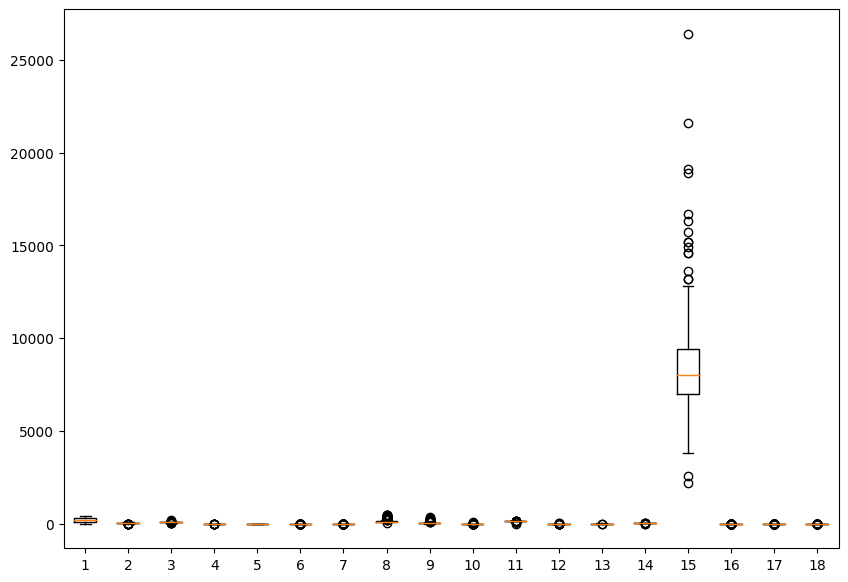

In [52]:
plt.figure(figsize=(10,7))
plt.boxplot(X)
plt.show()


In [53]:
#we are going to scale our data

sc_X = StandardScaler()
X= sc_X.fit_transform(X)

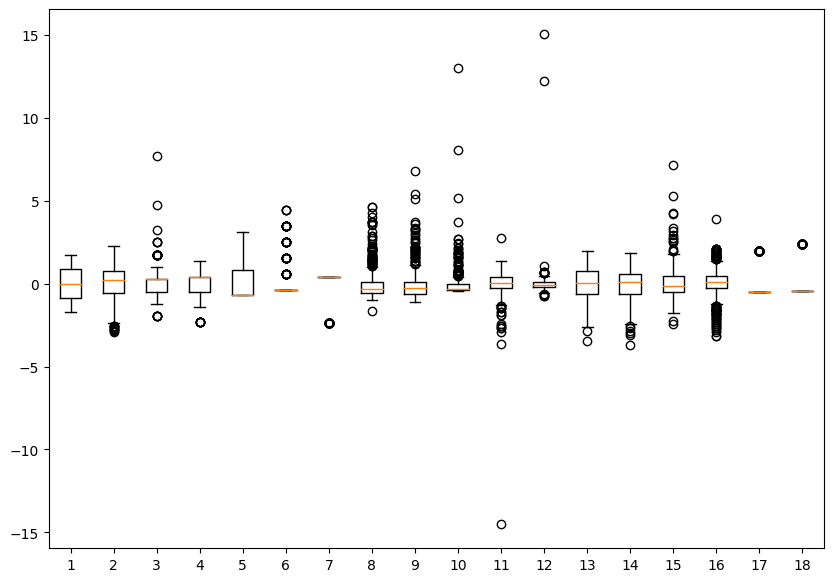

In [54]:
plt.figure(figsize=(10,7))
plt.boxplot(X)
plt.show()

In [55]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 17)
X = pca.fit_transform(X)

In [56]:
explained_ratio= pca.explained_variance_ratio_
np.cumsum(explained_ratio)

array([0.29341246, 0.39051369, 0.46858263, 0.54123885, 0.60510064,
       0.6656369 , 0.71475299, 0.75944797, 0.80202984, 0.84111732,
       0.87153419, 0.89860686, 0.92166553, 0.94388385, 0.96240233,
       0.97898709, 0.99205747])

In [57]:
X=df.iloc[:,:12]

In [58]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,train_size=0.8)

In [59]:
x_test.shape

(80, 12)

### Logistic Regression

In [60]:
acc = []
prsn = []
f1 = []
rcll = []

In [61]:
# model building
log_reg_model = LogisticRegression()
log_reg_model.fit(x_train,y_train)
#prediction
log_pr = np.round(log_reg_model.predict(x_test))
log_pr

array([1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0], dtype=int64)

In [62]:
log_acc = np.round(accuracy_score(y_test,log_pr),2)
acc.append(log_acc)

log_prsn = np.round(precision_score(y_test,log_pr),2)
prsn.append(log_prsn)

log_f1 = np.round(f1_score(y_test,log_pr),2)
f1.append(log_f1)

log_rcll = np.round(recall_score(y_test,log_pr),2)
rcll.append(log_rcll)

"Accuracy Score {}    Precision Score {}    F1 Score {}     Recall Score{}".format(log_acc,log_prsn,log_f1,log_rcll)

'Accuracy Score 0.96    Precision Score 0.91    F1 Score 0.95     Recall Score1.0'

### Decision Tree

In [63]:
dsn_tree = DecisionTreeClassifier(criterion="gini",splitter="random",random_state=10)
dsn_tree.fit(x_train,y_train)
dsn_pr = dsn_tree.predict(x_test)

In [64]:
dsn_acc = np.round(accuracy_score(y_test,dsn_pr),2)
acc.append(dsn_acc)

dsn_prsn = np.round(precision_score(y_test,dsn_pr),2)
prsn.append(dsn_prsn)

dsn_f1 = np.round(f1_score(y_test,dsn_pr),2)
f1.append(dsn_f1)

dsn_rcll = np.round(recall_score(y_test,dsn_pr),2)
rcll.append(dsn_rcll)

"Accuracy Score {}    Precision Score {}    F1 Score {}     Recall Score{}".format(dsn_acc,dsn_prsn,dsn_f1,dsn_rcll)

'Accuracy Score 1.0    Precision Score 1.0    F1 Score 1.0     Recall Score1.0'

### K-Nearest Neighbours

In [65]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
knn_pr=knn.predict(x_test)

In [66]:
knn_acc = np.round(accuracy_score(y_test,knn_pr),2)
acc.append(knn_acc)

knn_prsn = np.round(precision_score(y_test,knn_pr),2)
prsn.append(knn_prsn)

knn_f1 = np.round(f1_score(y_test,knn_pr),2)
f1.append(knn_f1)

knn_rcll = np.round(recall_score(y_test,knn_pr),2)
rcll.append(knn_rcll)

"Accuracy Score {}    Precision Score {}    F1 Score {}     Recall Score{}".format(knn_acc,knn_prsn,knn_f1,knn_rcll)

'Accuracy Score 0.94    Precision Score 0.88    F1 Score 0.92     Recall Score0.97'

In [67]:
import joblib

joblib.dump(dsn_tree, 'kidney.pkl')

['kidney.pkl']